In [1]:
import dask.dataframe as dd
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

# set neat seaborn whitegrid styles for matplotlib charts
plt.style.use('seaborn')
sns.set_style('whitegrid')

In [4]:
# load all data into memory
crimes = pd.read_csv("Chicago_Crimes_2012_to_2017.csv", encoding = "ISO-8859-1", index_col = 'Date')
print('Crime data loaded into memory.')

Crime data loaded into memory.


In [5]:
# preview crimes data with Date index
crimes.head(5)

,Unnamed: 0,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
05/03/2016 11:40:00 PM,3,10508693,HZ250496,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
05/03/2016 09:40:00 PM,89,10508695,HZ250409,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
05/03/2016 11:31:00 PM,197,10508697,HZ250503,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
05/03/2016 10:10:00 PM,673,10508698,HZ250424,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
05/03/2016 10:00:00 PM,911,10508699,HZ250455,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [6]:
%%time

# get crime types
crime_types = crimes[['Primary Type']]

# get crime counts by primary type
crime_type_total = crime_types.groupby('Primary Type').size()

# get arrests and domestic counts for each primary crime type
crime_type_counts = crimes[['Primary Type', 'Arrest', 'Domestic']]\
.groupby('Primary Type').sum()

# add crime type totals column
crime_type_counts['Total'] = crime_type_total

# print all crime stats (arrests, domestic, and totals)
print(crime_type_counts.sort_values(by='Total', ascending=False))

                                   Arrest  Domestic   Total
Primary Type                                               
THEFT                               36673     10519  329460
BATTERY                             60501    129130  263700
CRIMINAL DAMAGE                     10165     15933  155455
NARCOTICS                          134317        63  135240
ASSAULT                             21348     23099   91289
OTHER OFFENSE                       18573     27776   87874
BURGLARY                             4463       636   83397
DECEPTIVE PRACTICE                   8917       748   75495
MOTOR VEHICLE THEFT                  4254       575   61138
ROBBERY                              5460       857   57313
CRIMINAL TRESPASS                   25927      1501   36912
WEAPONS VIOLATION                   13746        57   17233
PUBLIC PEACE VIOLATION               9949       414   13122
OFFENSE INVOLVING CHILDREN           1821      6087   11398
PROSTITUTION                         759

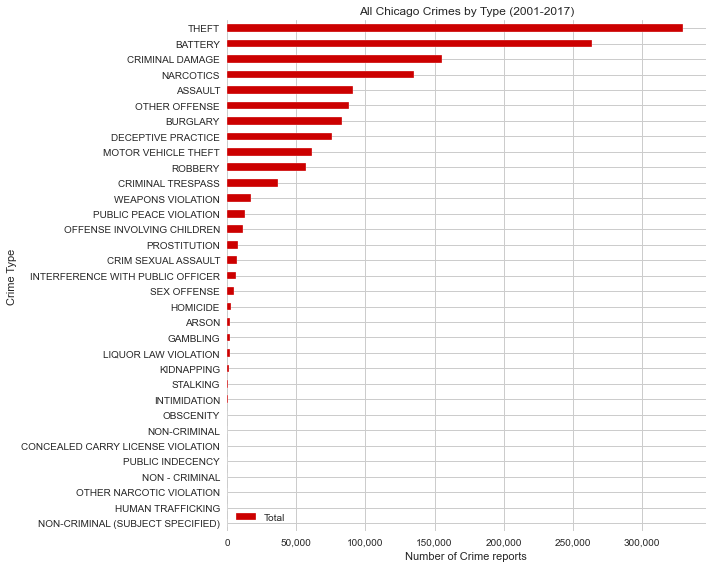

In [7]:
# plot crimes by primary type counts
all_crime_types = crime_type_counts.sort_values(by='Total', ascending=True)\
.drop(['Arrest', 'Domestic'], axis=1) # denotes column
all_crime_types.plot(kind='barh', figsize=(10,8), color='#cc0000')
plt.title('All Chicago Crimes by Type (2001-2017)')
plt.xlabel('Number of Crime reports')
plt.ylabel('Crime Type')
plt.tight_layout()
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()